In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
test_df.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
424,0.284260,-0.028546,-0.121040,-0.265261,-0.136755,-0.540622,-0.305172,-0.210114,-0.528219,0.098180,...,-0.722863,-0.092699,-0.931673,0.923096,-0.697393,-0.846018,0.140153,-0.084998,4,WALKING_DOWNSTAIRS
192,0.413642,-0.158395,-0.345978,-0.780569,-0.441845,-0.528045,-0.806673,-0.407823,-0.487051,-0.551011,...,-0.530152,-0.029312,0.236154,0.491606,-0.148767,-0.688770,0.126046,-0.205342,2,SITTING
2008,0.289236,-0.064961,-0.169075,-0.408345,-0.246670,-0.119238,-0.465431,-0.197360,-0.058699,-0.127512,...,-0.694133,-0.130685,-0.047916,0.786776,-0.643854,-0.709593,0.284065,-0.059086,18,WALKING_UPSTAIRS
201,0.273274,-0.013629,-0.096299,-0.994781,-0.974343,-0.984266,-0.995874,-0.976660,-0.983400,-0.935646,...,-0.649604,0.020326,-0.006587,-0.013384,-0.028175,-0.729128,0.174122,-0.160467,2,SITTING
1037,0.139595,-0.012088,-0.138793,-0.137152,-0.023620,-0.322311,-0.194216,-0.039889,-0.322099,0.134501,...,-0.584095,0.785388,0.041899,0.822080,0.335820,-0.746677,0.272699,0.004396,10,WALKING_UPSTAIRS


In [6]:
print("Train:",train_df.shape)
print("Test:",test_df.shape)

Train: (7352, 563)
Test: (2947, 563)


In [7]:
df = pd.concat([train_df, test_df])

<Axes: xlabel='Activity', ylabel='count'>

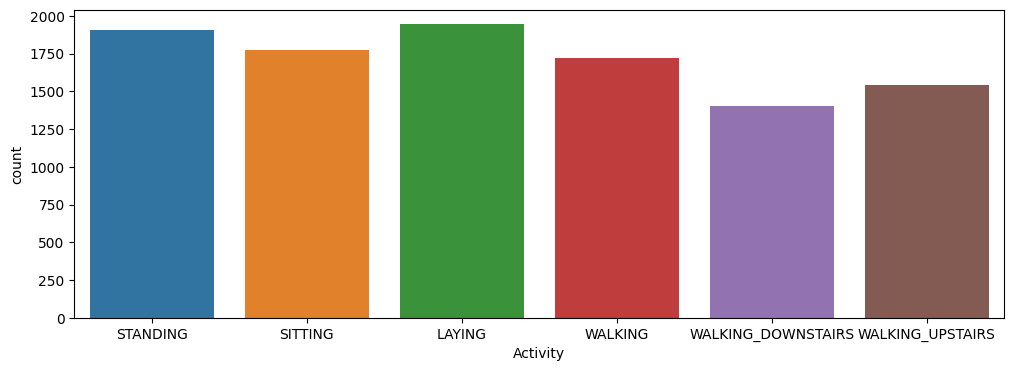

In [15]:
plt.figure(figsize = (12,4))
sns.countplot(df, x = 'Activity')

In [24]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
svc = SVC()


In [ ]:
from sklearn.model_selection import cross_val_score
models = [('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier()), ('svc', SVC())]

for model in models:
    y_hat = cross_val_score(model[1], X_train, y_train, cv= 10, scoring='accuracy')
    print(model[0], np.mean(y_hat))
for model in models: 
    for i in range(2,20):
        clf = cross_val_score(model[1], X_train, y_train, cv = i, scoring='accuracy')
    print(model[0], np.mean(clf))   

# using base models the predictions are
-  dt 0.9244927536231884
- knn 0.9634782608695653
- svc 0.9495652173913044

## lets use two ensemble learning to make predictions
- Voting Ensemble
- Bagging Ensemble


In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
vc  = VotingClassifier(estimators=models)
bc  = BaggingClassifier(estimator=SVC(), n_estimators=10,random_state=101)

In [43]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()), ('svc', SVC())])

In [44]:
y_hat = vc.predict(X_train)


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
def metrices(y_test, y_hat):
    print("Accuracy",accuracy_score(y_test, y_hat))
    print(classification_report(y_test, y_hat))
    print("Confusion matrix\n",confusion_matrix(y_test, y_hat))

In [49]:
# this is for training data:
metrices(y_train, y_hat)

0.9939130434782608
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1283
           SITTING       0.99      0.98      0.98      1158
          STANDING       0.98      0.99      0.98      1301
           WALKING       1.00      1.00      1.00      1130
WALKING_DOWNSTAIRS       1.00      1.00      1.00       950
  WALKING_UPSTAIRS       1.00      1.00      1.00      1078

          accuracy                           0.99      6900
         macro avg       0.99      0.99      0.99      6900
      weighted avg       0.99      0.99      0.99      6900

[[1283    0    0    0    0    0]
 [   0 1130   28    0    0    0]
 [   0   13 1288    0    0    0]
 [   0    0    0 1130    0    0]
 [   0    0    0    0  949    1]
 [   0    0    0    0    0 1078]]


In [50]:
y_hat = vc.predict(X_test)
metrices(y_test, y_hat)

0.9696969696969697
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.95      0.91      0.93       619
          STANDING       0.92      0.95      0.93       605
           WALKING       0.99      0.99      0.99       592
WALKING_DOWNSTAIRS       1.00      0.97      0.98       456
  WALKING_UPSTAIRS       0.97      0.99      0.98       466

          accuracy                           0.97      3399
         macro avg       0.97      0.97      0.97      3399
      weighted avg       0.97      0.97      0.97      3399

[[661   0   0   0   0   0]
 [  1 565  50   0   0   3]
 [  0  30 575   0   0   0]
 [  0   0   0 589   0   3]
 [  0   0   0   4 444   8]
 [  0   0   0   2   2 462]]


In [62]:
def classisifer_train(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_hat = vc.predict(X_train)
    metrices(y_train, y_hat)

In [55]:
classisifer_train(vc, X_train, y_train, X_test, y_test)

0.9939130434782608
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1283
           SITTING       0.99      0.98      0.98      1158
          STANDING       0.98      0.99      0.98      1301
           WALKING       1.00      1.00      1.00      1130
WALKING_DOWNSTAIRS       1.00      1.00      1.00       950
  WALKING_UPSTAIRS       1.00      1.00      1.00      1078

          accuracy                           0.99      6900
         macro avg       0.99      0.99      0.99      6900
      weighted avg       0.99      0.99      0.99      6900

[[1283    0    0    0    0    0]
 [   0 1130   28    0    0    0]
 [   0   13 1288    0    0    0]
 [   0    0    0 1130    0    0]
 [   0    0    0    0  949    1]
 [   0    0    0    0    0 1078]]


In [58]:
def classisifer_test(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_hat = vc.predict(X_test)
    metrices(y_test, y_hat)

In [57]:
classisifer_test(bc, X_train, y_train, X_test, y_test)

0.9691085613415711
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.95      0.92      0.93       619
          STANDING       0.92      0.95      0.94       605
           WALKING       0.98      0.99      0.99       592
WALKING_DOWNSTAIRS       1.00      0.97      0.98       456
  WALKING_UPSTAIRS       0.97      0.99      0.98       466

          accuracy                           0.97      3399
         macro avg       0.97      0.97      0.97      3399
      weighted avg       0.97      0.97      0.97      3399

[[661   0   0   0   0   0]
 [  2 567  47   0   0   3]
 [  0  31 574   0   0   0]
 [  0   0   0 589   0   3]
 [  0   0   0   6 443   7]
 [  0   0   0   4   2 460]]


In [63]:
bc  = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=10,random_state=101)
classisifer_train(bc, X_train, y_train, X_test, y_test)
classisifer_test(bc, X_train, y_train, X_test, y_test)

0.9939130434782608
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1283
           SITTING       0.99      0.98      0.98      1158
          STANDING       0.98      0.99      0.98      1301
           WALKING       1.00      1.00      1.00      1130
WALKING_DOWNSTAIRS       1.00      1.00      1.00       950
  WALKING_UPSTAIRS       1.00      1.00      1.00      1078

          accuracy                           0.99      6900
         macro avg       0.99      0.99      0.99      6900
      weighted avg       0.99      0.99      0.99      6900

[[1283    0    0    0    0    0]
 [   0 1130   28    0    0    0]
 [   0   13 1288    0    0    0]
 [   0    0    0 1130    0    0]
 [   0    0    0    0  949    1]
 [   0    0    0    0    0 1078]]
0.9691085613415711
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.95      0.92

In [64]:
bc  = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10,random_state=101)
classisifer_train(bc, X_train, y_train, X_test, y_test)
classisifer_test(bc, X_train, y_train, X_test, y_test)

0.9939130434782608
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1283
           SITTING       0.99      0.98      0.98      1158
          STANDING       0.98      0.99      0.98      1301
           WALKING       1.00      1.00      1.00      1130
WALKING_DOWNSTAIRS       1.00      1.00      1.00       950
  WALKING_UPSTAIRS       1.00      1.00      1.00      1078

          accuracy                           0.99      6900
         macro avg       0.99      0.99      0.99      6900
      weighted avg       0.99      0.99      0.99      6900

[[1283    0    0    0    0    0]
 [   0 1130   28    0    0    0]
 [   0   13 1288    0    0    0]
 [   0    0    0 1130    0    0]
 [   0    0    0    0  949    1]
 [   0    0    0    0    0 1078]]
0.9691085613415711
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.95      0.92

In [68]:
bc  = BaggingClassifier(estimator=LogisticRegression(solver = 'saga', max_iter=50), n_estimators=10,random_state=101)
classisifer_train(bc, X_train, y_train, X_test, y_test)
classisifer_test(bc, X_train, y_train, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

0.9939130434782608
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1283
           SITTING       0.99      0.98      0.98      1158
          STANDING       0.98      0.99      0.98      1301
           WALKING       1.00      1.00      1.00      1130
WALKING_DOWNSTAIRS       1.00      1.00      1.00       950
  WALKING_UPSTAIRS       1.00      1.00      1.00      1078

          accuracy                           0.99      6900
         macro avg       0.99      0.99      0.99      6900
      weighted avg       0.99      0.99      0.99      6900

[[1283    0    0    0    0    0]
 [   0 1130   28    0    0    0]
 [   0   13 1288    0    0    0]
 [   0    0    0 1130    0    0]
 [   0    0    0    0  949    1]
 [   0    0    0    0    0 1078]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

0.9691085613415711
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.95      0.92      0.93       619
          STANDING       0.92      0.95      0.94       605
           WALKING       0.98      0.99      0.99       592
WALKING_DOWNSTAIRS       1.00      0.97      0.98       456
  WALKING_UPSTAIRS       0.97      0.99      0.98       466

          accuracy                           0.97      3399
         macro avg       0.97      0.97      0.97      3399
      weighted avg       0.97      0.97      0.97      3399

[[661   0   0   0   0   0]
 [  2 567  47   0   0   3]
 [  0  31 574   0   0   0]
 [  0   0   0 589   0   3]
 [  0   0   0   6 443   7]
 [  0   0   0   4   2 460]]


In [70]:
param_grid_dt = {
    'criterion': ['log_loss','gini'],
    'splitter': ['best','random'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

In [75]:
from sklearn.model_selection import GridSearchCV
def grid_search_model(model,param_grid,  X_train, y_train, X_test, y_test):
    for i in range(2,10):
        grid = GridSearchCV(model, param_grid=param_grid, cv = i)
        grid.fit(X_train, y_train)
        y__hat = grid.predict(X_test)
        return(y__hat)

In [77]:
y_hat = grid_search_model(dt, param_grid_dt, X_train, y_train, X_test, y_test)

In [78]:
metrices(y_test, y_hat)

0.9435127978817299
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.94      0.90      0.92       619
          STANDING       0.91      0.94      0.93       605
           WALKING       0.96      0.95      0.95       592
WALKING_DOWNSTAIRS       0.94      0.93      0.94       456
  WALKING_UPSTAIRS       0.90      0.92      0.91       466

          accuracy                           0.94      3399
         macro avg       0.94      0.94      0.94      3399
      weighted avg       0.94      0.94      0.94      3399

[[661   0   0   0   0   0]
 [  0 560  58   0   0   1]
 [  0  34 571   0   0   0]
 [  0   0   0 560  10  22]
 [  0   0   0   4 425  27]
 [  1   0   0  20  15 430]]


In [79]:
param_grid_svc = {
    'C': [0.1, 0.01, 5, 10],
    'kernel':['linear','poly','rbf','sigmoid']
}

In [81]:
y_hat = grid_search_model(svc, param_grid_svc, X_train, y_train, X_test, y_test)
metrices(y_test, y_hat)

0.9829361576934392
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.96      0.96      0.96       619
          STANDING       0.96      0.96      0.96       605
           WALKING       0.99      1.00      1.00       592
WALKING_DOWNSTAIRS       1.00      0.99      0.99       456
  WALKING_UPSTAIRS       0.99      0.99      0.99       466

          accuracy                           0.98      3399
         macro avg       0.98      0.98      0.98      3399
      weighted avg       0.98      0.98      0.98      3399

[[661   0   0   0   0   0]
 [  0 592  24   0   0   3]
 [  0  24 581   0   0   0]
 [  0   0   0 591   0   1]
 [  0   0   0   3 453   0]
 [  0   0   0   1   2 463]]


In [83]:
param_grid_knn = {
    'n_neighbors': [4,5,6,10,12],
    'weights':['distance', 'uniform'],
}


In [84]:
y_hat = grid_search_model(knn, param_grid_knn, X_train, y_train, X_test, y_test)
metrices(y_test, y_hat)

0.9702853780523684
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       661
           SITTING       0.96      0.89      0.92       619
          STANDING       0.90      0.96      0.93       605
           WALKING       0.99      0.99      0.99       592
WALKING_DOWNSTAIRS       1.00      0.99      0.99       456
  WALKING_UPSTAIRS       0.99      1.00      0.99       466

          accuracy                           0.97      3399
         macro avg       0.97      0.97      0.97      3399
      weighted avg       0.97      0.97      0.97      3399

[[661   0   0   0   0   0]
 [  0 552  64   0   0   3]
 [  0  25 580   0   0   0]
 [  0   0   0 589   1   2]
 [  0   0   0   4 450   2]
 [  0   0   0   0   0 466]]
